In [56]:
#https://jovian.ai/aakashns/python-sklearn-linear-regression#C0 link para leer los detalles.

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

#Probando modificacion,.

('medical.csv', <http.client.HTTPMessage at 0x2124cba9130>)

In [ ]:
catarata= 'catarata'

In [57]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')

medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [58]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [60]:
fig = px.histogram(medical_df, #Analisis de la categoria Age
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig

In [61]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig

In [62]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig

In [63]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['pink', 'blue'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig

In [64]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'red', 'blue', 'yellow'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig

In [65]:
print(medical_df.region.value_counts())
print(medical_df.sex.value_counts())
print(medical_df.children.value_counts())

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
sex
male      676
female    662
Name: count, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [66]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig

In [67]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig

In [68]:
px.violin(medical_df, x='children', y='charges')

<Axes: xlabel='region', ylabel='charges'>

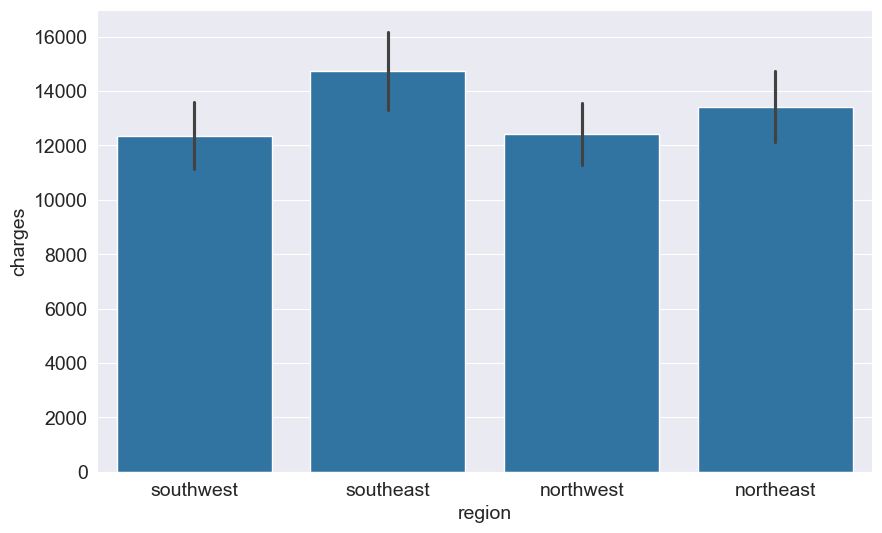

In [69]:
sns.barplot(medical_df, x='region', y='charges')

In [70]:
px.violin(medical_df, x='smoker', y='charges', color='sex')

In [71]:
print(medical_df.charges.corr(medical_df.age))
print(medical_df.charges.corr(medical_df.bmi))
print(medical_df.charges.corr(medical_df.children))

0.2990081933306476
0.19834096883362878
0.06799822684790469


In [72]:
smoker_numeric = {'no': 0, 'yes':1}
smoker_n = medical_df.smoker.map(smoker_numeric) #Al ser una variable categorica, debemos mapearla para volverla numerica
print(medical_df.charges.corr(smoker_n))

0.7872514304984782


In [73]:
region_numeric = {'southeast':1,'southwest':2,'northeast':3,'northwest':4}
region_n = medical_df.region.map(region_numeric)
print(medical_df.charges.corr(region_n))

-0.05699278109241929


In [74]:
medical_df2 = medical_df[['age','bmi','children','charges']]
medical_df2.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

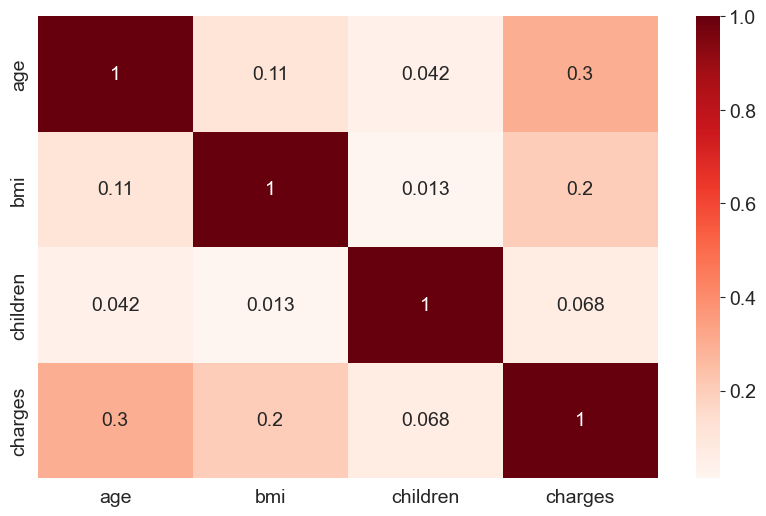

In [75]:
sns.heatmap(medical_df2.corr(), cmap='Reds', annot=True)

In [76]:
non_smoker = medical_df[medical_df.smoker == 'no']

px.scatter(non_smoker, x='age', y='charges', color='sex', opacity=0.7, title='Age v. Charges in no Smokers')

In [77]:
def gastos_estimados(age, w, b):
    return w*age+b

w= 100
b = 50

In [78]:
ages_no_smoker = non_smoker.age

gastos_e_non_smoker =  gastos_estimados(ages_no_smoker,b,w)



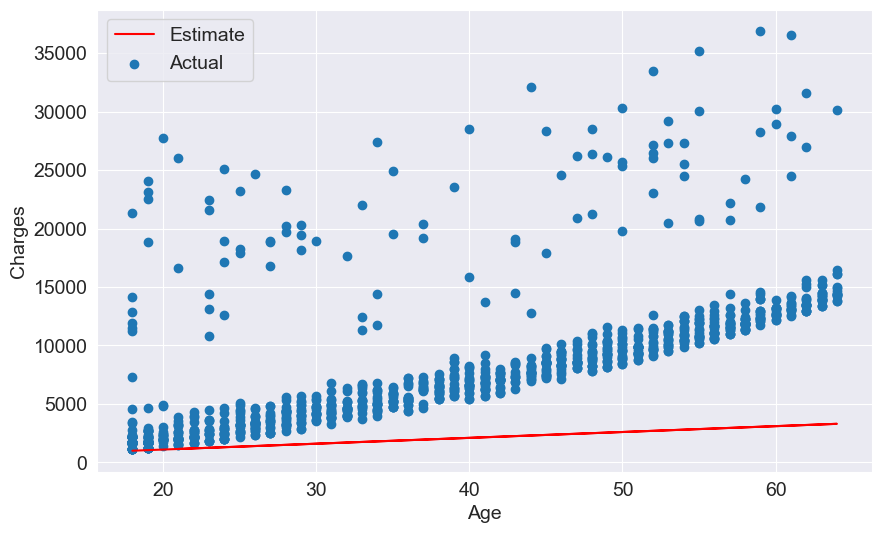

In [79]:
objetivo = non_smoker.charges

plt.plot(ages_no_smoker, gastos_e_non_smoker, 'r')
plt.scatter(ages_no_smoker, non_smoker.charges)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [80]:
def try_parameters(w, b):
    ages = ages_no_smoker
    target = non_smoker.charges
    
    estimated_charges = gastos_estimados(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

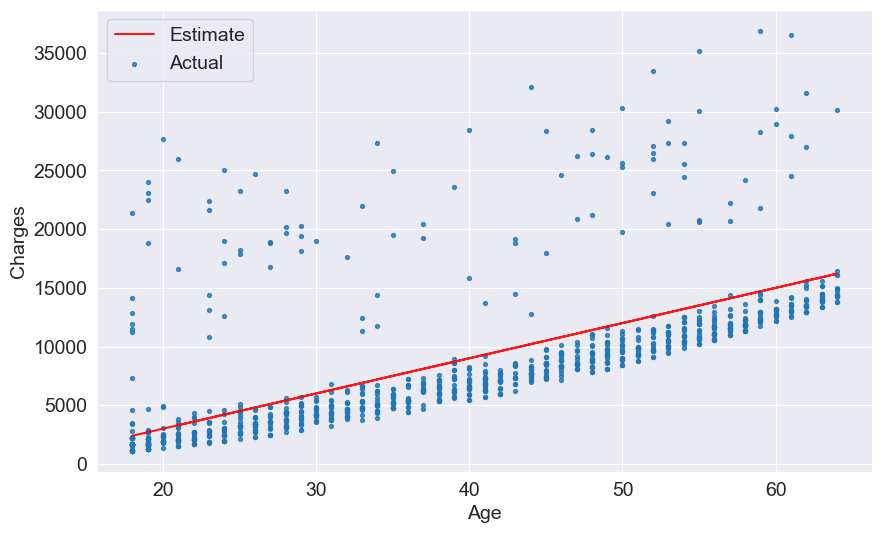

In [81]:
try_parameters(300,-3000)

In [82]:
target = medical_df[medical_df.smoker == 'no'].charges
predictions = gastos_estimados(ages_no_smoker,300,-3000)

residual = predictions - target

In [83]:
residual_potencia = residual**2 #Calculamos el root mean squared error

residual_potencia.mean()**0.5

4700.736524304107

In [84]:
import numpy as np

In [85]:
def rsme(targets, predictions):
    return round(np.sqrt(np.mean(np.square(targets-predictions))),2)

rsme(target, predictions)

4700.74

In [86]:
def try_parameters(w, b):
    ages = ages_no_smoker
    target = non_smoker.charges
    
    estimated_charges = gastos_estimados(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss = rsme(target, estimated_charges)

    print(f'RMSE is: {loss}')

RMSE is: 4669.21


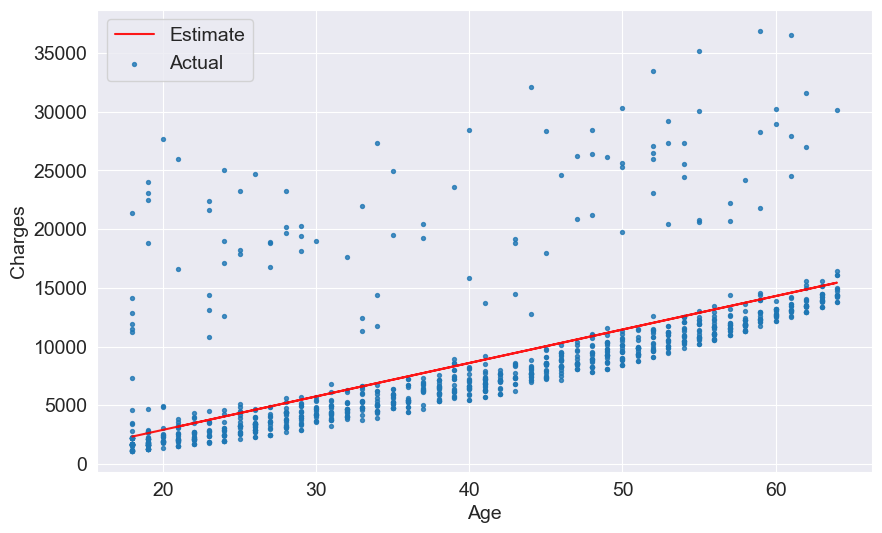

In [87]:
try_parameters(285,-2800)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
model = LinearRegression()

In [90]:
inputs = non_smoker[['age']]
targets = non_smoker.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [91]:
model.fit(inputs, targets)

LinearRegression()

In [92]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

c:\Users\lucat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [93]:
predictions = model.predict(inputs)

rsme(targets, predictions)

4662.51

In [94]:
model.coef_

array([267.24891283])

In [95]:
model.intercept_

-2091.4205565650864

RMSE is: 4662.51


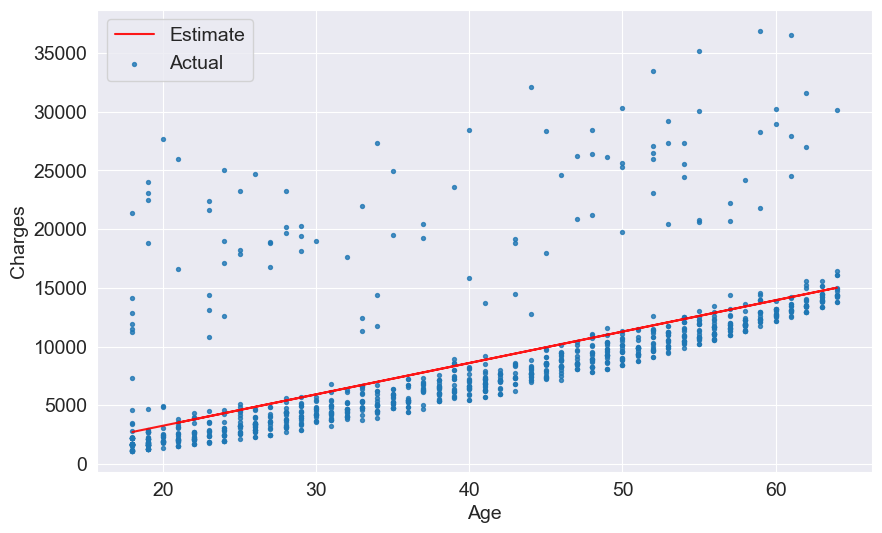

In [96]:
try_parameters(model.coef_, model.intercept_)

EXERCISE: Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.

In [97]:
smoker = medical_df[medical_df.smoker == 'yes']
inputs = smoker[['age']]
targets = smoker.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (274, 1)
targes.shape : (274,)


In [98]:
model.fit(inputs, targets)
predictions = model.predict(inputs)

rsme(targets, predictions)

10711.0

In [107]:
def gastos_estimados(age, w, b):
    return w*age+b

In [106]:
estimados = gastos_estimados(inputs,model.coef_, model.intercept_)

estimados

,age,bmi
1,2510.146316,-2054.693244
2,5178.912098,-2060.141361
3,6513.294989,-2132.983393
4,6246.418411,-2089.292325
5,5979.541832,-2111.509321
...,...,...
1332,11583.949974,-1977.358284
1333,11050.196818,-2074.504579
1334,2510.146316,-2067.782876
1335,2510.146316,-2032.900776


In [99]:
def try_parameters(w, b):
    smoker = medical_df[medical_df.smoker == 'yes']
    ages = smoker[['age']]
    target = smoker.charges
    
    estimated_charges = gastos_estimados(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss = rsme(target, estimated_charges)

    print(f'RMSE is: {loss}')

RMSE is: nan


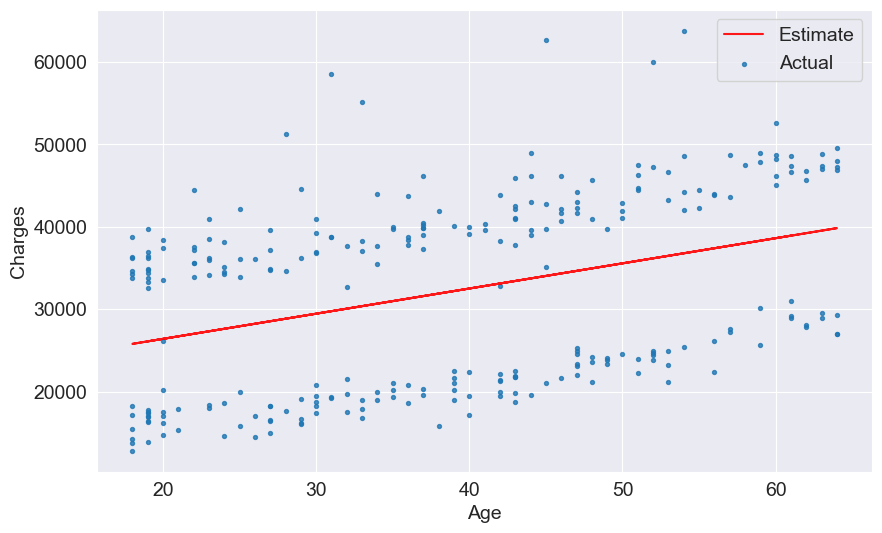

In [100]:
try_parameters(model.coef_, model.intercept_)

In [108]:
model.coef_

array([266.87657817,   7.07547666])

In [101]:
# Create inputs and targets
inputs, targets = non_smoker[['age', 'bmi']], non_smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rsme(targets, predictions)
print('Loss:', loss)

Loss: 4662.31


In [102]:
non_smoker.charges.corr(non_smoker.bmi) #No hay relacion 

0.0840365431283327

In [103]:
fig = px.scatter(non_smoker, x='bmi', y='charges', title='BMI vs. Charges')
#fig.update_traces(marker_size=5)
fig.show()

EXERCISE: Train a linear regression model to estimate charges using BMI alone. Do you expect it to be better or worse than the previously trained models?

In [109]:
# Create inputs and targets
inputs, targets = medical_df[['bmi']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rsme(targets, predictions)
print('Loss:', loss)

Loss: 11864.99


RMSE is: nan


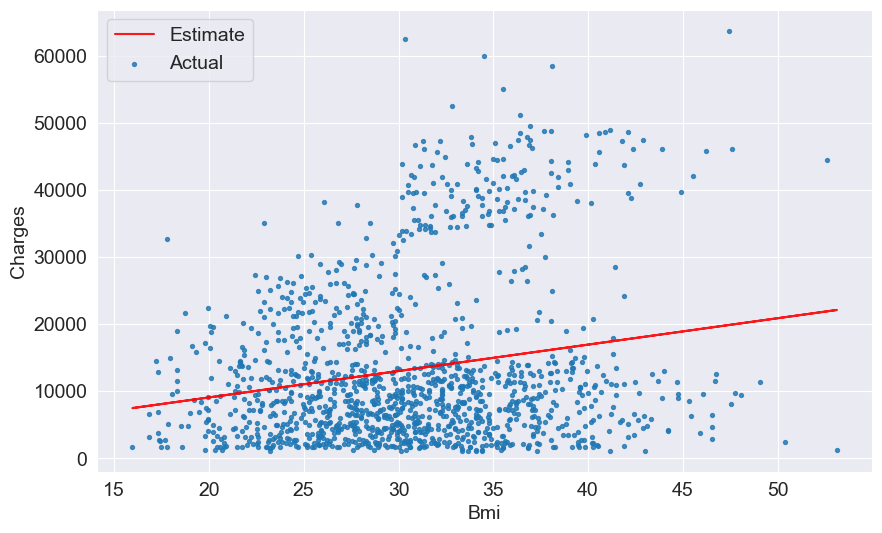

In [112]:
def try_parameters(w, b):
    bmi = medical_df[['bmi']]
    target = medical_df.charges
    
    estimated_charges = gastos_estimados(bmi, w, b)
    
    plt.plot(bmi, estimated_charges, 'r', alpha=0.9)
    plt.scatter(bmi, target, s=8,alpha=0.8)
    plt.xlabel('Bmi')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss = rsme(target, estimated_charges)

    print(f'RMSE is: {loss}')

try_parameters(model.coef_, model.intercept_)

In [113]:
inputs, targets = non_smoker[['age', 'bmi', 'children']], non_smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rsme(targets, predictions)
print('Loss:', loss)

Loss: 4608.47


EXERCISE: Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.

In [114]:
inputs, targets = smoker[['age', 'bmi', 'children']], smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rsme(targets, predictions)
print('Loss:', loss)

Loss: 5718.2


EXERCISE: Repeat the steps is this section to train a linear regression model to estimate medical charges for all customers. Visualize the targets and predictions, and compute the loss. Is the loss lower or higher?

In [115]:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rsme(targets, predictions)
print('Loss:', loss)

Loss: 11355.32


In [117]:
smoker_codes = {'yes': 1, 'no':0}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [118]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rsme(targets, predictions)
print('Loss:', loss)

Loss: 6056.44


In [120]:
sex_code = {'male': 0, 'female':1}
medical_df['sex_code'] = medical_df.sex.map(sex_code)

inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code','sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rsme(targets, predictions)
print('Loss:', loss)

Loss: 6056.1


In [122]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])

one_hot = enc.transform(medical_df[['region']]).toarray()

medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

medical_df



,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0.0,0.0,0.0,1.0


In [131]:

inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']], medical_df['charges']

# Create and train the model
model_total = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model_total.predict(inputs)

# Compute loss to evalute the model
loss = rsme(targets, predictions)
print('Loss:', loss)

Loss: 6041.68


In [126]:
smoker = medical_df[medical_df.smoker == 'yes']

inputs, targets = smoker[['age', 'bmi', 'children', 'smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']], smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rsme(targets, predictions)
print('Loss:', loss)

Loss: 5668.47


In [130]:
no_smoker = medical_df[medical_df.smoker == 'no']

inputs, targets = no_smoker[['age', 'bmi', 'children', 'smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']], no_smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rsme(targets, predictions)
print('Loss:', loss)

model.coef_

Loss: 4573.07


array([ 2.64481438e+02,  1.89804618e+01,  5.87458257e+02, -1.42108547e-13,
        5.25970487e+02,  7.33683019e+02,  1.85554256e+02, -2.58365372e+02,
       -6.60871903e+02])

In [132]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model_total.coef_, model_total.intercept_)
})
weights_df

#Hay que normalizar/estandarizar los valores porque parece que age tiene menos peso que la region northeast.
# El problema es que el rango de años es muy amplio 18-80 aprox, mientras que de region es 0/1

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12656.862171


In [133]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [135]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values


In [136]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model_total = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model_total.predict(inputs)

# Compute loss to evalute the model
loss = rsme(targets, predictions)
print('Loss:', loss)

Loss: 6041.68


In [137]:

weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model_total.coef_, model_total.intercept_)
})
weights_df.sort_values('weight', ascending=False)

weights_df



,feature,weight
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,smoker_code,23848.534542
4,sex_code,131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,8335.168856
